<a href="https://colab.research.google.com/github/viett887g/2/blob/main/send_ndn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model, layers
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/train1Folder'
image_names = os.listdir(folder_path) # Lấy danh sách tên các file ảnh
X1 = []

for image_name in image_names:
  image_path = os.path.join(folder_path, image_name) # Tạo đường dẫn tới từng ảnh
  # Đọc ảnh và chuyển nó thành mảng numpy
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Chuyển ảnh từ BGR sang RGB (do OpenCV đọc ảnh dưới dạng BGR)
  img = cv2.resize(img, (224, 224)) # Thay đổi kích thước ảnh nếu cần
  X1.append(img)

# Chuyển list các mảng numpy thành một mảng numpy
X1 = np.array(X1)

In [ ]:
folder_path = '/content/drive/MyDrive/train2Folder'
image_names = os.listdir(folder_path) # Lấy danh sách tên các file ảnh
X2 = []

for image_name in image_names:
  image_path = os.path.join(folder_path, image_name) # Tạo đường dẫn tới từng ảnh
  # Đọc ảnh và chuyển nó thành mảng numpy
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Chuyển ảnh từ BGR sang RGB (do OpenCV đọc ảnh dưới dạng BGR)
  img = cv2.resize(img, (224, 224)) # Thay đổi kích thước ảnh nếu cần
  X2.append(img)

# Chuyển list các mảng numpy thành một mảng numpy
X2 = np.array(X1)

In [ ]:
y1=[]
for x in range(1,11):
  y1.append(x)
y2=[]
for x in range(1,11):
  y2.append(x)

In [ ]:
y= np.concatenate((y1,y2))
y= np.array(y)

X= np.concatenate((X1,X2))
X=np.array(X)

In [ ]:
print(X.shape)
print(y.shape)

(20, 224, 224, 3)
(20,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)

(16, 224, 224, 3)


In [ ]:
print(y_train.shape)

(16,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
batch_size = 128
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 148.1655 - accuracy: 0.0000e+00 - val_loss: -13860.7139 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: -22238.6895 - accuracy: 0.0625 - val_loss: -36065.6250 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: -57012.0156 - accuracy: 0.0625 - val_loss: -69765.5391 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: -108905.2656 - accuracy: 0.0625 - val_loss: -118470.5078 - val_accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: -183007.4688 - accuracy: 0.0625 - val_loss: -186932.0938 - val_accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: -286560.6250 - accuracy: 0.0625 - val_loss: -279703.1875 - val_accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: -427186.2500 - accuracy: 0.0625 - val_loss

In [ ]:
y_hat = model.predict(X_test)

1/1 [==============================] - 0s 250ms/step


In [ ]:
print(y_hat[1])

[1.]


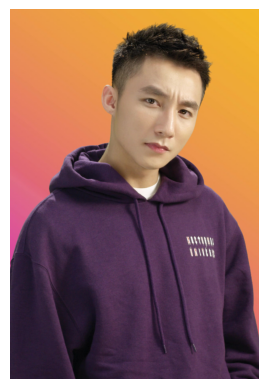

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Đường dẫn đến file ảnh
image_path = '/content/drive/MyDrive/test1Folder/st1.png'

# Đọc ảnh
image = mpimg.imread(image_path)

# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')
plt.show()


